In [9]:
%load_ext autoreload
%autoreload 2

%pip install -r ../../requirements.txt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.


In [10]:
import sys
import pickle

# Se agrega el path para poder importar los modulos locales
if "../" not in sys.path:
    sys.path.append("../")

import pandas as pd

import xgboost as xg
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

import shap

In [11]:
X = pd.read_parquet("data/variables.parquet")
y = pd.read_parquet("../../resources/flights_clean.parquet")["Passengers"]

In [12]:
train_x, test_x, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

eval_set = [(test_x, test_y)]

train_dmatrix = xg.DMatrix(data=train_x, label=train_y)
test_dmatrix = xg.DMatrix(data=test_x, label=test_y)

# xgb_r = XGBRegressor(n_estimators=10, seed=123)
xgb_r = XGBRegressor(learning_rate=0.5, n_estimators=250, random_state=0)
xgb_r.fit(train_x, train_y, eval_set=eval_set, verbose=True)
y_pred = xgb_r.predict(test_x)

[0]	validation_0-rmse:31.26335
[1]	validation_0-rmse:29.13425
[2]	validation_0-rmse:28.01126
[3]	validation_0-rmse:27.40916
[4]	validation_0-rmse:26.87932
[5]	validation_0-rmse:26.67605
[6]	validation_0-rmse:26.46818
[7]	validation_0-rmse:26.16182
[8]	validation_0-rmse:25.89217
[9]	validation_0-rmse:25.72326
[10]	validation_0-rmse:25.59665
[11]	validation_0-rmse:25.28524
[12]	validation_0-rmse:25.01155
[13]	validation_0-rmse:24.91278
[14]	validation_0-rmse:24.73183
[15]	validation_0-rmse:24.59565
[16]	validation_0-rmse:24.50673
[17]	validation_0-rmse:24.23432
[18]	validation_0-rmse:24.11975
[19]	validation_0-rmse:23.93564
[20]	validation_0-rmse:23.79620
[21]	validation_0-rmse:23.70610
[22]	validation_0-rmse:23.67836
[23]	validation_0-rmse:23.57863
[24]	validation_0-rmse:23.53655
[25]	validation_0-rmse:23.48622
[26]	validation_0-rmse:23.46430
[27]	validation_0-rmse:23.38348
[28]	validation_0-rmse:23.34547
[29]	validation_0-rmse:23.33065
[30]	validation_0-rmse:23.29236
[31]	validation_0-

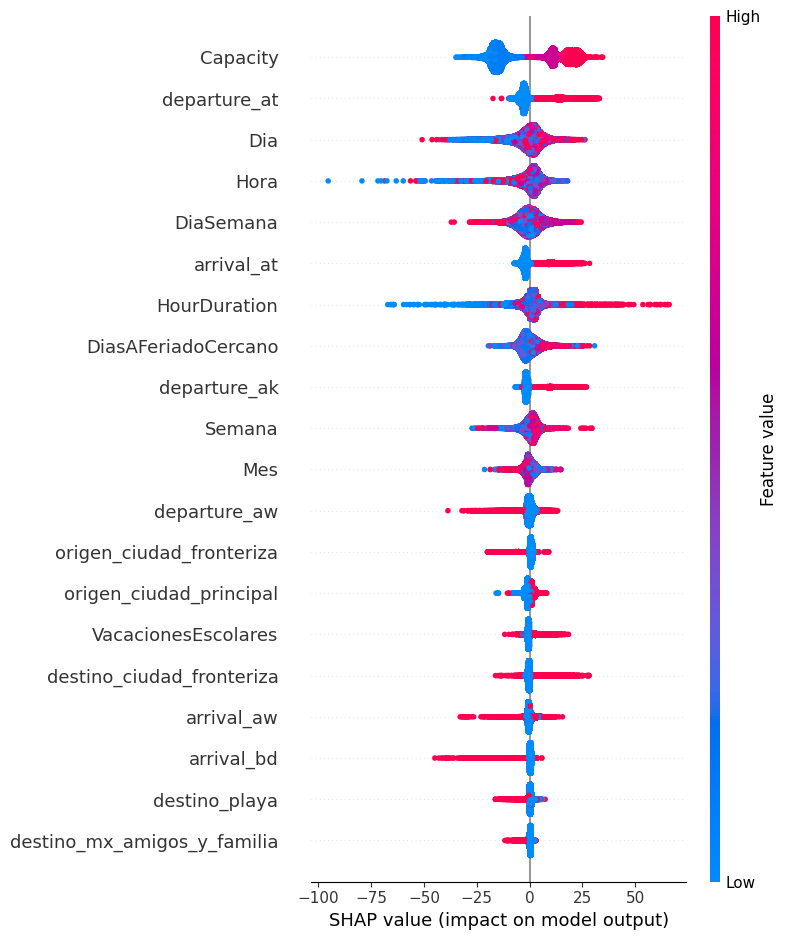

In [14]:
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(train_x)
shap.summary_plot(shap_values, train_x)

In [16]:
pickle.dump(xgb_r, open("models/xgb_pasajeros_model.pickle", "wb"))